# Streeter-Phelps model

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

This is a Python computer program to solve the Steeter-Phelps model.

\begin{equation}
 		\frac{d D}{d t} = k_1 L_a e^{-k_1 t} - k_2 D
\end{equation}
where $D$ is oxygen deficit (=$DO_{sat} - DO$), $k_1$ is the deoxygenation rate, $k_2$ is the reaeration rate. 

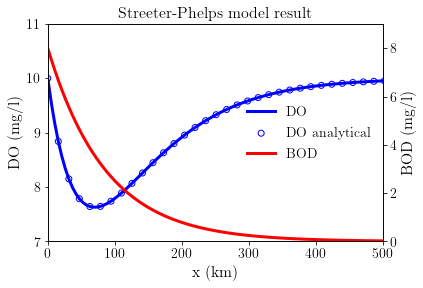

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


def dD_dt(D,t,k1,k2,La):
    return k1*La*np.exp(-k1*t) - k2*D

#parameters
k1 = 0.2  #1/day; deoxygenation rate
k2 = 0.3    #1/day; reaeration rate
La = 8   #mg/l; initial oxygen demand (=ultimate BOD)
Da = 0    #mg/l; initial oxygen deficit
DOsat = 10 #mg/l; DO saturation
U =  0.2*86400  #m/day; stream flow velocity

tend = 30  #days

t = np.linspace(0,tend,100)
x = t*U    #m
res, infodict = integrate.odeint(dD_dt,Da,t,args=(k1,k2,La), full_output=True)
D = res.T
DO = DOsat - D

Danalytical = k1*La/(k2-k1)*(np.exp(-k1*x/U)-np.exp(-k2*x/U)) + Da*np.exp(-k2*x/U)
DOanalytical = DOsat - Danalytical

#print(DO[0,:])

Lt = La*np.exp(-k1*x/U)

fig,ax = plt.subplots(1)

ax.plot(x/1000,DO[0,:],'b',linewidth=3,label='DO')
ax.scatter((x/1000)[::3],DOanalytical[::3],color='b', marker = 'o', facecolor='none',label='DO analytical')

ax2 = ax.twinx()
ax2.plot(x/1000,Lt,'r',linewidth=3,label='BOD')

#set x and y axes label and font size
ax.set_xlabel('x (km)',fontsize=16)
ax.set_ylabel('DO (mg/l)',fontsize=16)
ax2.set_ylabel('BOD (mg/l)',fontsize=16)

#set the limit for the x and y axes
ax.set_xlim([0,500])
ax.set_ylim([7,11])
ax2.set_ylim([0,9])

#show the ticks on both axes and set the font size 
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

#show title and set font size
ax.set_title('Streeter-Phelps model result',fontsize=16)

#show legend, set its location, font size, and turn off the frame
handles,labels = ax.get_legend_handles_labels()
handles2,labels2 = ax2.get_legend_handles_labels()

handles = [handles[0], handles[1], handles2[0]]
labels = [labels[0], labels[1], labels2[0]]

ax.legend(handles,labels,loc='right',fontsize=14,frameon=False)

plt.savefig("Streeter-Phelps.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
